<a href="https://colab.research.google.com/github/zzeeddd95/capstone-project/blob/master/Decisiontreeregressorgoogle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
import pandas_datareader as web
import matplotlib.pyplot as plt
plt.style.use('bmh')


In [18]:
from google.colab import files
apple = files.upload()

Saving GOOG.csv to GOOG (1).csv


In [38]:
goog = pd.read_csv('GOOG.csv')
goog.head(6)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-05-26,240.134918,243.965561,236.613113,236.847244,236.847244,6977200
1,2010-05-27,241.569534,245.235794,239.626816,244.314255,244.314255,5639200
2,2010-05-28,245.449997,245.803665,240.598175,241.908264,241.908264,5811200
3,2010-06-01,239.317978,244.613129,239.163559,240.284363,240.284363,5353500
4,2010-06-02,242.431305,246.012878,239.831055,245.763824,245.763824,5100500
5,2010-06-03,246.630569,253.051498,246.426331,251.855988,251.855988,7328700


In [39]:
goog.shape

(2516, 7)

In [40]:
#Filter out data to only obtain close price (independant variable)
goog = goog[['Close']]
goog

,Close
0,236.847244
1,244.314255
2,241.908264
3,240.284363
4,245.763824
...,...
2511,1383.939941
2512,1373.484985
2513,1406.719971
2514,1402.800049


In [72]:
#Create a variable to allow for predicting 'n days' into the future
future_out =365

In [73]:
#Create the dependant variable which will be shifted 'n' units up
goog['Prediction'] = goog[['Close']].shift(-future_out)
goog.tail()

,Close,Prediction
2511,1383.939941,NaN
2512,1373.484985,NaN
2513,1406.719971,NaN
2514,1402.800049,NaN
2515,1410.420044,NaN


In [74]:
#create independant data set by converting the dataframe to a numpy array
googdfx = np.array(goog.drop(['Prediction'],1))
#Renove the last 'n' rows
googdfx = googdfx[:-future_out] #therefore for every column, all of the rows will be displayed - future out
googdfx

array([[ 236.847244],
       [ 244.314255],
       [ 241.908264],
       ...,
       [1068.72998 ],
       [1036.579956],
       [1039.550049]])

In [75]:
#creat dependant dataset (prediction), all values including any Nan's
googdfy = np.array(goog['Prediction'])
#Filter this data by obtaining all values except the last 'n' rows
googdfy = googdfy[:-future_out]
print(googdfy)

[ 297.634399  296.95694   303.029175 ... 1406.719971 1402.800049
 1410.420044]


In [76]:
#split data into 80% training and 20%testing
googdfx_train , googdfx_test, googdfy_train, googdfy_test = train_test_split(googdfx, googdfy, test_size = 0.2)

In [77]:
#Create and train the decision tree regressor model
tree = DecisionTreeRegressor().fit(googdfx_train,googdfy_train)

In [78]:
#test model accuracy via score which returns the coefficient of determination (R^2) of prediction
treeconfidence = tree.score(googdfx_test, googdfy_test)
print("Decision tree regressor confidence", treeconfidence)

Decision tree regressor confidence 0.9232398131976668


In [79]:
#set goog_forecast = to the last 365 rows of original dataset from close price column
goog_forecast = np.array(goog.drop(['Prediction'],1))[-future_out:]
print(goog_forecast)


[[1051.75    ]
 [1063.680054]
 [1061.900024]
 [1042.099976]
 [1016.530029]
 [1028.709961]
 [1023.01001 ]
 [1009.409973]
 [ 979.539978]
 [ 976.219971]
 [1039.459961]
 [1043.880005]
 [1037.079956]
 [1035.609985]
 [1045.849976]
 [1016.059998]
 [1070.709961]
 [1068.390015]
 [1076.280029]
 [1074.660034]
 [1070.329956]
 [1057.189941]
 [1044.689941]
 [1077.150024]
 [1080.969971]
 [1089.900024]
 [1098.26001 ]
 [1070.52002 ]
 [1075.569946]
 [1073.900024]
 [1090.98999 ]
 [1070.079956]
 [1060.619995]
 [1089.060059]
 [1116.369995]
 [1110.75    ]
 [1132.800049]
 [1145.98999 ]
 [1115.22998 ]
 [1098.709961]
 [1095.060059]
 [1095.01001 ]
 [1121.369995]
 [1120.160034]
 [1121.670044]
 [1113.650024]
 [1118.560059]
 [1113.800049]
 [1096.969971]
 [1110.369995]
 [1109.400024]
 [1115.130005]
 [1116.050049]
 [1119.920044]
 [1140.98999 ]
 [1147.800049]
 [1162.030029]
 [1157.859985]
 [1143.300049]
 [1142.319946]
 [1175.76001 ]
 [1193.199951]
 [1193.319946]
 [1185.550049]
 [1184.459961]
 [1184.26001 ]
 [1198.849

In [80]:
#Print decision tree predicted values for upcoming 'n' days
treeprediction = tree.predict(goog_forecast)
print(treeprediction)

[1239.410034  1066.040039  1326.800049  1141.1099855 1221.099976
 1246.52002   1164.209961  1162.300049  1205.5       1093.390015
 1410.420044  1375.73999   1133.469971  1162.380005  1085.349976
 1238.709961  1042.219971  1406.719971  1263.469971  1176.630005
 1283.25      1078.719971  1375.73999   1053.050049  1102.48999
 1168.390015  1259.130005  1042.219971  1263.469971  1176.630005
 1167.26001   1283.25      1308.859985  1356.130005  1105.619995
 1152.319946  1097.949951  1204.800049  1345.02002   1259.130005
 1209.01001   1209.01001   1162.810059  1298.800049  1080.910034
 1146.329956  1340.619995  1345.02002   1242.800049  1110.709961
 1198.449951  1345.02002   1105.619995  1298.800049  1355.119995
 1056.619995  1393.180054  1295.280029  1204.800049  1204.800049
 1144.209961  1219.72998   1219.72998   1367.369995  1280.390015
 1280.390015  1351.890015  1480.390015  1508.790039  1360.660034
 1219.72998   1280.390015  1215.560059  1115.290039  1215.560059
 1084.329956  1119.800049 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


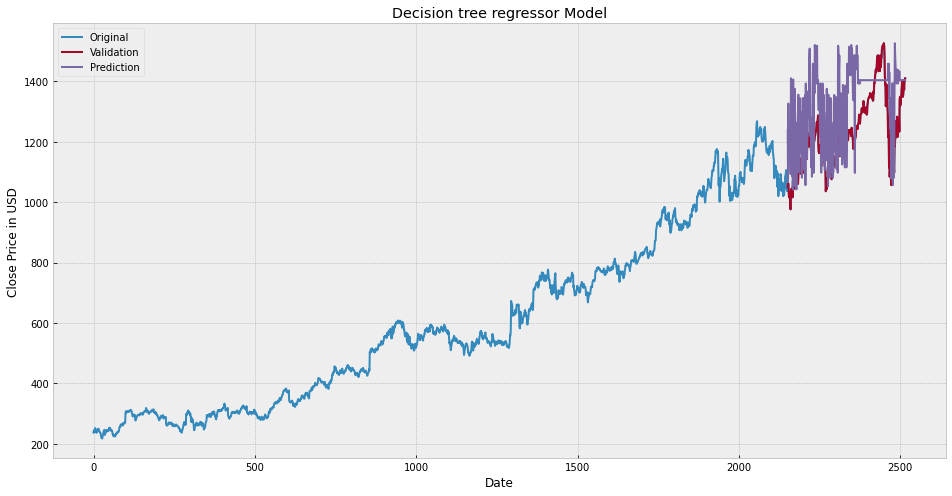

In [81]:
prediction = treeprediction
valid = goog[googdfx.shape[0]:]
valid['Prediction'] = prediction
plt.figure(figsize = (16,8))
plt.title ('Decision tree regressor Model')
plt.xlabel('Date')
plt.ylabel('Close Price in USD')
plt.plot(goog['Close'])
plt.plot(valid[['Close','Prediction']])
plt.legend(['Original','Validation','Prediction'])
plt.show()